# Sentiment Analysis on Mobile Banking reviews

The given task is to learn sentiment from all the given reviews and predict rating from a new review. This objective is attained by following the steps listed below:

### Importing the modules

In [2]:
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 

In [3]:
col_names = ["test", "sentiment"]

data = pd.read_csv('train.csv',names=col_names,error_bad_lines=False)
print(data.head())

                                                test  sentiment
0                                               text  sentiment
1  For a movie that gets no respect there sure ar...          0
2  Bizarre horror movie filled with famous faces ...          0
3  A solid, if unremarkable film. Matthau, as Ein...          0
4  It's a strange feeling to sit alone in a theat...          0


# Data Labeling

- In this step we clean the data and label the data as <br>
  > 0 for Poor <br>
  > 1 for Neutral <br>
  > 2 for Good
- Read the data from __'Amazon_Unlocked_Mobile.csv'__ and add new column for labels

In [4]:
def label_data():
      col_names = ["test", "sentiment"]
      data = pd.read_csv('train.csv',names=col_names,error_bad_lines=False)    
#     labels = []
#     for cell in rows['sentiment']:
#         if cell == 1:
#             labels.append('1')   #Good
#         else:
#             labels.append('0')   #Poor
            
#     rows['label'] = labels
#     del rows['review']
#     return rows
print(data.head())

                                                test  sentiment
0                                               text  sentiment
1  For a movie that gets no respect there sure ar...          0
2  Bizarre horror movie filled with famous faces ...          0
3  A solid, if unremarkable film. Matthau, as Ein...          0
4  It's a strange feeling to sit alone in a theat...          0


### Data Cleaning

Remove all the rows containing blank cells. The resultant data is stored as __'labelled_dataset.csv'__

In [5]:
def clean_data(data):
    col_names = ["test", "sentiment"]
    data = pd.read_csv('train.csv',names=col_names,error_bad_lines=False)    
    return data

In [6]:
print(data.head())

                                                test  sentiment
0                                               text  sentiment
1  For a movie that gets no respect there sure ar...          0
2  Bizarre horror movie filled with famous faces ...          0
3  A solid, if unremarkable film. Matthau, as Ein...          0
4  It's a strange feeling to sit alone in a theat...          0


### Data preprocessing

The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.

- remove html tags using BeautifulSoup
- remove non-character such as digits and symbols
- convert to lower case
- remove stop words such as "the" and "and" if needed
- convert to root words by stemming if needed

In [7]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [8]:
def modelEvaluation(predictions, y_test_set):
    #Print model evaluation to predicted result 
    
#     print "\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions))
    print ("\nAccuracy on validation set: % 5.2f " %(accuracy_score(y_test_set, predictions)))
    #print "\nAUC score : {:.4f}".format(roc_auc_score(y_test_set, predictions))
    print ("\nClassification report : \n", metrics.classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_set, predictions))

### Bag of Words

The sentiment analysis of given text can be done in two ways. First, we need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's the workflow in this part.

- Step 1 : Preprocess raw reviews to cleaned reviews
- Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn
- Step 3 : Transform review text to numerical representations (feature vectors)
- Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)
- Step 5 : Improve the model performance by GridSearch

In [9]:
if __name__ == '__main__':
#     data = label_data()
#     data = clean_data(data)        ----------
    #prints first 5 rows of the dataset
    print(data.head())    

                                                test  sentiment
0                                               text  sentiment
1  For a movie that gets no respect there sure ar...          0
2  Bizarre horror movie filled with famous faces ...          0
3  A solid, if unremarkable film. Matthau, as Ein...          0
4  It's a strange feeling to sit alone in a theat...          0


### Visualisation

In [10]:
#     # Plot distribution of rating
#     plt.figure(figsize=(12,8))
#     # sns.countplot(data['Rating'])
#     data['sentiment'].value_counts().sort_index().plot(kind='bar')
#     plt.title('Distribution of Rating')
#     plt.xlabel('sentiment')
#     plt.ylabel('Count')

In [11]:
    # Plot number of reviews for top 20 brands
#     brands = datas["test"].value_counts()
#     # brands.count()
#     plt.figure(figsize=(12,8))
#     brands[:40].plot(kind='bar')
#     plt.title("Top 40 review")

In [12]:
#     # Plot number of reviews for top 50 products
#     products = datas["test"].value_counts()
#     plt.figure(figsize=(12,8))
#     products[:50].plot(kind='bar')
#     plt.title("Number of Reviews for Top 50 Products")

In [13]:
#     # Plot distribution of review length
#     review_length = data["test"].dropna().map(lambda x: len(x))
#     plt.figure(figsize=(12,8))
#     review_length.loc[review_length < 1500].hist()
#     plt.title("Distribution of Review Length")
#     plt.xlabel('Review length (Number of character)')
#     plt.ylabel('Count')

In [14]:
    #split data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(data['test'], data['sentiment'], test_size=0.1, random_state=0)
    
    
    #If the label are words instead of numbers, they can be replaced programmatically using following two lines
    #y_train = label_binarize(y_train, classes=[0, 1, 2])
#     x_test_cleaned = pd.read_csv('test.csv',names=col_names,error_bad_lines=False)
#     x_test = x_test_cleaned[:2000]

In [15]:
    # Preprocess text data in training set and validation set
    x_train_cleaned = []
    x_test_cleaned = []

    for d in x_train:
        x_train_cleaned.append(cleanText(d))

    for d in x_test:
        x_test_cleaned.append(cleanText(d))    

### CountVectorizer with Mulinomial Naive Bayes (Benchmark Model)

Now we have cleaned reviews, the next step is to convert the reviews into numerical representations for machine learning algorithm.

In sklearn library, we can use CountVectorizer which implements both tokenization and occurrence counting in a single class. The output is a sparse matrix representation of a document.

In [16]:
    # Fit and transform the training data to a document-term matrix using CountVectorizer
    countVect = CountVectorizer() 
    x_train_countVect = countVect.fit_transform(x_train_cleaned)
    print ("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
    print ("Show some feature names : \n", countVect.get_feature_names()[::1000])

Number of features : 70383 

Show some feature names : 
 ['aa', 'afterworld', 'analyst', 'armistead', 'awwwwww', 'beaches', 'biochemical', 'boos', 'budding', 'capri', 'chao', 'clanging', 'companies', 'cooper', 'crucial', 'deathscythe', 'desperadoes', 'dislocated', 'dragonballz', 'eerieness', 'entente', 'exist', 'feels', 'flounce', 'frumpish', 'gertrude', 'grading', 'haggard', 'heiden', 'honkin', 'ignorance', 'infringement', 'ishmael', 'judgment', 'kisses', 'larky', 'limos', 'luske', 'marguerite', 'meet', 'misawa', 'motorist', 'neanderthals', 'nozzle', 'organics', 'pantomime', 'perms', 'pleadings', 'preform', 'pucking', 'rantings', 'reified', 'revitalize', 'rout', 'savalas', 'selina', 'shoes', 'sled', 'soundtract', 'starring', 'subjecting', 'swith', 'tenderfoot', 'titillates', 'tricked', 'unclean', 'untapped', 'victimized', 'watling', 'withdrawal', 'yuletide']


In [17]:
    # Train MultinomialNB classifier
    mnb = MultinomialNB()
    mnb.fit(x_train_countVect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
    # Evaluate the model on validaton set
    predictions = mnb.predict(countVect.transform(x_test_cleaned))
    modelEvaluation(predictions, y_test)
    print(predictions)


Accuracy on validation set:  0.85 

Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1241
           1       0.83      0.89      0.86      1260

    accuracy                           0.85      2501
   macro avg       0.85      0.85      0.85      2501
weighted avg       0.85      0.85      0.85      2501


Confusion Matrix : 
 [[1007  234]
 [ 138 1122]]
['1' '0' '1' ... '1' '0' '0']


In [19]:
print(data['sentiment'].value_counts())

1            12500
0            12500
sentiment        1
Name: sentiment, dtype: int64


### TfidfVectorizer with Logistic Regression

Some words might frequently appear but have little meaningful information about the sentiment of a particular review. Instead of using occurance counting, we can use tf-idf transform to scale down the impact of frequently appeared words in a given corpus.

In sklearn library, we can use TfidfVectorizer which implements both tokenization and tf-idf weighted counting in a single class.

In [20]:
    # Fit and transform the training data to a document-term matrix using TfidfVectorizer 
    tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
    x_train_tfidf = tfidf.fit_transform(x_train)
    print ("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
    print ("Show some feature names : \n", tfidf.get_feature_names()[::1000])

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(x_train_tfidf, y_train)

Number of features : 25937 

Show some feature names : 
 ['00', 'ambiguous', 'barbaric', 'breasts', 'cheerfulness', 'consideration', 'decked', 'doped', 'eschews', 'flips', 'gorier', 'his', 'insisting', 'krige', 'mahatma', 'moms', 'oddest', 'perspectives', 'prophecy', 'rendition', 'satirized', 'siren', 'stepped', 'teenage', 'twentieth', 'vulgar']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
    # Look at the top 10 features with smallest and the largest coefficients
    feature_names = np.array(tfidf.get_feature_names())
    sorted_coef_index = lr.coef_[0].argsort()
    print ("Total number of features = " + str(len(sorted_coef_index)))
    print ('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
    print ('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Total number of features = 25937

Top 10 features with smallest coefficients :
['worst' 'bad' 'awful' 'waste' 'boring' 'poor' 'terrible' 'nothing'
 'worse' 'no']

Top 10 features with largest coefficients : 
['great' 'excellent' 'best' 'perfect' 'wonderful' 'amazing' 'well' 'loved'
 'love' 'favorite']


In [22]:

    # Evaluate on the validaton set
    predictions = lr.predict(tfidf.transform(x_test_cleaned))
    print(predictions)

    modelEvaluation(predictions, y_test)

['1' '0' '1' ... '1' '0' '0']

Accuracy on validation set:  0.88 

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1241
           1       0.89      0.87      0.88      1260

    accuracy                           0.88      2501
   macro avg       0.88      0.88      0.88      2501
weighted avg       0.88      0.88      0.88      2501


Confusion Matrix : 
 [[1108  133]
 [ 161 1099]]


### SVM and Trees

system will use two algorithms SVM and Random Forest to perform analysis and to determine which suits better for recommendation.

### Support Vector Machine

Here we implement multi-svm for sentiment analysis. More information about it can be found on [this](http://scikit-learn.org/stable/modules/svm.html) link. <br>

- Tip 1 : Here, different kernels can be tried out. For example, linear, nonlinear, precomputed, rbf etc.
- Tip 2 : The parameter values given below can be tweaked to obtain different results.

### Using LinearSVC

Here you can tweak the api parameters of LinearSVC as per your choice. Refer to [this](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) link for making any changes.

In [23]:
    #x_train_subset = tfidf.transform(x_train_cleaned[:100])
    x_train_input = tfidf.transform(x_train_cleaned)
    svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
    svr_lin.fit(x_train_input, y_train)
    y_svr_lin_predicted = svr_lin.predict(tfidf.transform(x_test_cleaned))
#     print(y_svr_lin_predicted)
    sample = ["Bikas is very Bad.But some time it works beeter"]
    sample = tfidf.transform(sample).toarray()
    sentiment = svr_lin.predict(sample)
    print(sentiment)

['0']


In [24]:
# Test Manually 
sample = ["Bikas is very Bad.But some time it works beeter.It is not okey to use"]
sample = tfidf.transform(sample).toarray()
sentiment = svr_lin.predict(sample)
print(sentiment)

['1']


In [25]:
    modelEvaluation(y_svr_lin_predicted, y_test)


Accuracy on validation set:  0.88 

Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      1241
           1       0.89      0.88      0.88      1260

    accuracy                           0.88      2501
   macro avg       0.88      0.88      0.88      2501
weighted avg       0.88      0.88      0.88      2501


Confusion Matrix : 
 [[1102  139]
 [ 150 1110]]


### Functions for Model Evaluation

There are multiple functions for model evaluation in scikit learn. To know more about them, please follow the below mentioned links
- [accuracy score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
- [f_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)
- [f1_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [26]:
    print (str(metrics.accuracy_score(y_test, y_svr_lin_predicted)))
#     print "Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_svr_lin_predicted, pos_label=2, average='weighted'))
#     print "F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_svr_lin_predicted, pos_label=2, average='weighted'))
#     print "confusion matrix = " + str(metrics.confusion_matrix(y_test, y_svr_lin_predicted))

0.8844462215113954


In [27]:
#     not run this code 
#     print "Accuracy of this SVM = " + str(metrics.accuracy_score(y_test, y_svr_lin_predicted))
#     print "Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_svr_lin_predicted, pos_label=2, average='weighted'))
#     print "F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_svr_lin_predicted, pos_label=2, average='weighted'))
#     print "confusion matrix = " + str(metrics.confusion_matrix(y_test, y_svr_lin_predicted))

### Random Forest

Refer to [this](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#id1) link for more information

In [28]:
    rand = RandomForestClassifier()
    rand.fit(x_train_input, y_train)
    y_rand_predicted = rand.predict(tfidf.transform(x_test_cleaned))
    print(y_rand_predicted)
#     sample = ["Dhaka wasa water is not useable.Very bad"]
#     sample = tfidf.transform(sample).toarray()
#     sentiment = clf.predict(sample)
#     print(sentiment)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['1' '1' '1' ... '0' '1' '0']


In [29]:
    modelEvaluation(y_rand_predicted, y_test)


Accuracy on validation set:  0.75 

Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77      1241
           1       0.80      0.67      0.73      1260

    accuracy                           0.75      2501
   macro avg       0.75      0.75      0.75      2501
weighted avg       0.76      0.75      0.75      2501


Confusion Matrix : 
 [[1029  212]
 [ 418  842]]


In [30]:
    print("Result Of Accuracy")

Result Of Accuracy


In [31]:
    print (rand.score(tfidf.transform(x_test_cleaned), y_test))
    print("Result Of Accuracy")

0.7481007596961216
Result Of Accuracy


In [32]:
#        Not Run
#     print ("Accuracy of Random Forest = " + str(rand.score(tfidf.transform(x_test_cleaned), y_test)))
#     print ("Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_predicted, pos_label=2, average='weighted')))
#     print ("F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_predicted, pos_label=2, average='weighted')))
#     print ("confusion matrix = " + str(metrics.confusion_matrix(y_test, y_predicted)))

### Decision Tree

Refer [this](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) link for more information

In [35]:
    decTree = DecisionTreeClassifier()
    decTree.fit(x_train_input, y_train)
    y_decTree_predicted = decTree.predict(tfidf.transform(x_test_cleaned))
#     sample = ["Dhaka wasa water is not useable.Very bad"]
#     sample = tfidf.transform(sample).toarray()
#     sentiment = clf.predict(sample)
#     print(sentiment)
    

In [36]:
    modelEvaluation(y_decTree_predicted, y_test)


Accuracy on validation set:  0.70 

Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      1241
           1       0.71      0.70      0.70      1260

    accuracy                           0.70      2501
   macro avg       0.70      0.70      0.70      2501
weighted avg       0.70      0.70      0.70      2501


Confusion Matrix : 
 [[878 363]
 [383 877]]


In [ ]:
    print (decTree.score(tfidf.transform(x_test_cleaned), y_test))
#     print "Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_decTree_predicted, pos_label=2, average='weighted'))
#     print "F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_decTree_predicted, pos_label=2, average='weighted'))
#     print "confusion matrix = " + str(metrics.confusion_matrix(y_test, y_decTree_predicted))

In [ ]:
#     Not Run
#     print "Accuracy of Decision Tree = " + str(decTree.score(tfidf.transform(x_test_cleaned), y_test))
#     print "Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_decTree_predicted, pos_label=2, average='weighted'))
#     print "F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_decTree_predicted, pos_label=2, average='weighted'))
#     print "confusion matrix = " + str(metrics.confusion_matrix(y_test, y_decTree_predicted))

# Read CSV File Data 

In [55]:
col_names = ["test","sentiment",'company']
datas = pd.read_csv('data_store/yes.csv',names=col_names,error_bad_lines=False)
# displaying data frame again - Output 2 
test_datas = datas['test'].tolist()
# print(datas.head())
sentiment_datas = datas['sentiment']

#Testing For Add Data in specific column
sentiment_datas[1] = 1
print(sentiment_datas)


0      sentiment
1              1
2            NaN
3            NaN
4            NaN
         ...    
148          NaN
149          NaN
150          NaN
151          NaN
152          NaN
Name: sentiment, Length: 153, dtype: object


In [56]:
#Global Variable Desine
total_positive = 0
total_negative = 0


In [57]:
# Sentiment Prediction  from test data
i = 1
for data in test_datas:
    sample = [data]
    sample = tfidf.transform(sample)
    sentiment = rand.predict(sample)
    sentiment_datas[i] = int(sentiment)
    print(type(sentiment))
    print(data,"Sentiment : ",sentiment)
    i = i+1
#     print('********************************',sentiment) 
    

<class 'numpy.ndarray'>
test Sentiment :  ['0']
<class 'numpy.ndarray'>
Changes are extremely high than standard.  3rd grade level security.  Sentiment :  ['0']
<class 'numpy.ndarray'>
Its not good Sentiment :  ['0']
<class 'numpy.ndarray'>
its good.  Sentiment :  ['0']
<class 'numpy.ndarray'>
Its good Sentiment :  ['0']
<class 'numpy.ndarray'>
Good Sentiment :  ['0']
<class 'numpy.ndarray'>
It is good. Sentiment :  ['0']
<class 'numpy.ndarray'>
Charge little bit high but other service is good.   Sentiment :  ['0']
<class 'numpy.ndarray'>
Nothing  Sentiment :  ['1']
<class 'numpy.ndarray'>
It's quite good. Sentiment :  ['0']
<class 'numpy.ndarray'>
It'sgreat   Sentiment :  ['0']
<class 'numpy.ndarray'>
Bkash security aren't that much secure.& the charge cost are quit increasing when a persontry to send a lot of money then they need to pay quite much amount of service charge.     Sentiment :  ['0']
<class 'numpy.ndarray'>
Good Sentiment :  ['0']
<class 'numpy.ndarray'>
Good system it bu

ValueError: invalid literal for int() with base 10: 'sentiment'

In [58]:
print(datas.shape)
print(datas['sentiment'].tolist())
print(datas['sentiment'].count)

(153, 3)
['sentiment', 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
<bound method Series.count of 0      sentiment
1              0
2              0
3              0
4              0
         ...    
148          NaN
149          NaN
150          NaN
151          NaN
152          NaN
Name: sentiment, Length: 153, dtype: object>


In [59]:
positive = []
negative = []

for d in datas['sentiment'].tolist():
    
    if d == 0:
        positive.append(0)
    else:
        negative.append(1)
print(len(positive))
print(len(negative))

72
81


In [60]:
print(type(datas['sentiment'].tolist()))

<class 'list'>


TypeError: 'module' object is not callable

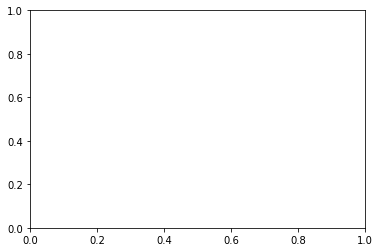

In [89]:
# Demo Test **********************************************************************************************************
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Bakash', 'Nagot', 'Ucache', 'Roket']
men_means = [55, 34, 30, 35]
women_means = [25, 32, 34, 20]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Positive')
rects2 = ax.bar(x + width/2, women_means, width, label='Negative')
plt(x="X", y=["A", "B", "C"], kind="bar")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Datas')
ax.set_title(' Top Finance Mobile Banking in Bangladesh')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Individual Company In Together or Group Bar Chart for Yes - SVM


In [62]:
col_names = ["test","sentiment","company"]
datas = pd.read_csv('data_store/yes.csv',names=col_names,error_bad_lines=False)
yes_datas = datas
print(datas['company'].tolist())
sentiment_datas = datas['sentiment']
test_datas = datas['test'].tolist()



['company', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u']


In [63]:
# Sentiment Prediction  from test data
i = 1
for data in test_datas:
    sample = [data]
    sample = tfidf.transform(sample)
    sentiment = rand.predict(sample)
    sentiment_datas[i] = int(sentiment)
    print(type(sentiment))
    print(data,"Sentiment : ",sentiment)
    i = i+1

<class 'numpy.ndarray'>
test Sentiment :  ['0']
<class 'numpy.ndarray'>
Changes are extremely high than standard.  3rd grade level security.  Sentiment :  ['0']
<class 'numpy.ndarray'>
Its not good Sentiment :  ['0']
<class 'numpy.ndarray'>
its good.  Sentiment :  ['0']
<class 'numpy.ndarray'>
Its good Sentiment :  ['0']
<class 'numpy.ndarray'>
Good Sentiment :  ['0']
<class 'numpy.ndarray'>
It is good. Sentiment :  ['0']
<class 'numpy.ndarray'>
Charge little bit high but other service is good.   Sentiment :  ['0']
<class 'numpy.ndarray'>
Nothing  Sentiment :  ['1']
<class 'numpy.ndarray'>
It's quite good. Sentiment :  ['0']
<class 'numpy.ndarray'>
It'sgreat   Sentiment :  ['0']
<class 'numpy.ndarray'>
Bkash security aren't that much secure.& the charge cost are quit increasing when a persontry to send a lot of money then they need to pay quite much amount of service charge.     Sentiment :  ['0']
<class 'numpy.ndarray'>
Good Sentiment :  ['0']
<class 'numpy.ndarray'>
Good system it bu

ValueError: invalid literal for int() with base 10: 'sentiment'

In [64]:
print(datas['company'].tolist())
print(type(datas['sentiment']))

['company', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u']
<class 'pandas.core.series.Series'>


In [65]:
positive_b = []
negative_b = []
positive_r = []
negative_r = []
positive_n = []
negative_n = []
positive_u = []
negative_u = []
hello = "Yes"

# for bakash
i = 1
for c in datas['company']:
    
#         print(type(c))
    if c == 'b':
#         print(datas['company'][i])
        if  datas['sentiment'][i] == 1 :
            negative_b.append(1)
            i =i+1

        elif datas['sentiment'][i] == 0:
            positive_b.append(0)  

            i= i+1
            
# For Rocket            
            
i = 1
for c in datas['company']:
    
#         print(type(c))
    if c == 'r':
#         print(datas['company'][i])
        if  datas['sentiment'][i] == 1 :
            negative_r.append(1)
            i =i+1

        elif datas['sentiment'][i] == 0:
            positive_r.append(0)  
            i= i+1
# For Nogot            
            
i = 1
for c in datas['company']:
    
#         print(type(c))
    if c == 'n':
#         print(datas['company'][i])
        if  datas['sentiment'][i] == 1 :
            negative_n.append(1)
            i =i+1

        elif datas['sentiment'][i] == 0:
            positive_n.append(0)  
            i= i+1

# For Ucache            
            
i = 1
for c in datas['company']:
    
#         print(type(c))
    if c == 'u':
#         print(datas['company'][i])
        if  datas['sentiment'][i] == 1 :
            negative_u.append(1)
            i =i+1

        elif datas['sentiment'][i] == 0:
            positive_u.append(0)  
            i= i+1


    
print(len(positive_b))
print(len(negative_b))
# print(i)
# print(datas['sentiment'].tolist()[10])
positive_yb = positive_b
negative_yb = negative_b
positive_yr = positive_r
negative_yr = negative_r
positive_yn = positive_n
negative_yn = negative_n
positive_yu = positive_u
negative_yu = negative_u

72
4


In [66]:
print(len(positive_r))
print(len(negative_r))

19
1


# Group Bar Chart for individual SVM  YES

94.73684210526316
5.2631578947368425


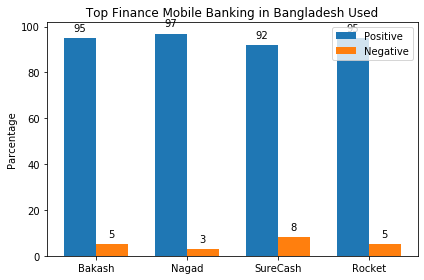

In [67]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Bakash', 'Nagad', 'SureCash', 'Rocket']

# Calculating Percentage Positive
bp_p = (len(positive_b) * 100)/(len(positive_b)+len(negative_b))
np_p = (len(positive_n) * 100)/(len(positive_n)+len(negative_n))
up_p = (len(positive_u) * 100)/(len(positive_u)+len(negative_u))
rp_p = (len(positive_r) * 100)/(len(positive_r)+len(negative_r))
print(bp_p)

# Calculating Percentage Negative
bn_p = (len(negative_b) * 100)/(len(positive_b)+len(negative_b))
nn_p = (len(negative_n) * 100)/(len(positive_n)+len(negative_n))
un_p = (len(negative_u) * 100)/(len(positive_u)+len(negative_u))
rn_p = (len(negative_r) * 100)/(len(positive_r)+len(negative_r))
print(bn_p)

positive_bar = [round(bp_p), round(np_p), round(up_p), round(rp_p)]
negative_bar = [round(bn_p), round(nn_p), round(un_p), round(rn_p)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
positive = ax.bar(x - width/2, positive_bar, width, label='Positive')
negative = ax.bar(x + width/2, negative_bar, width, label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Parcentage')
ax.set_title(' Top Finance Mobile Banking in Bangladesh Used ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(positive)
autolabel(negative)

fig.tight_layout()

plt.show()

# Individual Company In Together or Group Bar Chart for NO SVM


In [68]:
col_names = ["test","sentiment","company"]
datas = pd.read_csv('data_store/no.csv',names=col_names,error_bad_lines=False)
no_datas = datas
print(datas['company'].tolist())
sentiment_datas = datas['sentiment']
test_datas = datas['test'].tolist()


['company', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u']


In [69]:
# Sentiment Prediction  from test data
i = 1
for data in test_datas:
    sample = [data]
    sample = tfidf.transform(sample)
    sentiment = rand.predict(sample)
    sentiment_datas[i] = int(sentiment)
    print(type(sentiment))
    print(data,"Sentiment : ",sentiment)
    i = i+1

<class 'numpy.ndarray'>
test Sentiment :  ['0']
<class 'numpy.ndarray'>
They provide a good service. I am happy with there service Sentiment :  ['0']
<class 'numpy.ndarray'>
Test Bikash Data Sentiment :  ['0']
<class 'numpy.ndarray'>
Very Good Service Sentiment :  ['0']
<class 'numpy.ndarray'>
service is good, security is good, availability is good .Very Good service Sentiment :  ['0']
<class 'numpy.ndarray'>
I really happy with there service. They provide a great security service and nice looking app. Easy to use and shop is available every where. Sentiment :  ['0']
<class 'numpy.ndarray'>
Yes, Bkash sequrity is very high and their service is so comfortable.I used Bkash for about three month. Sentiment :  ['0']
<class 'numpy.ndarray'>
Its doing good  Sentiment :  ['0']
<class 'numpy.ndarray'>
service,security& availability is good. I think if the service charge is lees then it can be more helpful. Sentiment :  ['0']
<class 'numpy.ndarray'>
Customers service is good but cash out charge

ValueError: invalid literal for int() with base 10: 'sentiment'

In [70]:
print(datas['company'].tolist())
print(type(datas['sentiment']))

['company', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u']
<class 'pandas.core.series.Series'>


In [71]:
positive_b = []
negative_b = []
positive_r = []
negative_r = []
positive_n = []
negative_n = []
positive_u = []
negative_u = []
hello = "Yes"

# for bakash
i = 1
for c in datas['company']:
    
#         print(type(c))
    if c == 'b':
#         print(datas['company'][i])
        if  datas['sentiment'][i] == 1 :
            negative_b.append(1)
            i =i+1

        elif datas['sentiment'][i] == 0:
            positive_b.append(0)  
            i= i+1
            
# For Rocket            
            
i = 1
for c in datas['company']:
    
#         print(type(c))
    if c == 'r':
#         print(datas['company'][i])
        if  datas['sentiment'][i] == 1 :
            negative_r.append(1)
            i =i+1

        elif datas['sentiment'][i] == 0:
            positive_r.append(0)  
            i= i+1
# For Nogot            
            
i = 1
for c in datas['company']:
    
#         print(type(c))
    if c == 'n':
#         print(datas['company'][i])
        if  datas['sentiment'][i] == 1 :
            negative_n.append(1)
            i =i+1

        elif datas['sentiment'][i] == 0:
            positive_n.append(0)  
            i= i+1

# For Ucache            
            
i = 1
for c in datas['company']:
    
#         print(type(c))
    if c == 'u':
#         print(datas['company'][i])
        if  datas['sentiment'][i] == 1 :
            negative_u.append(1)
            i =i+1

        elif datas['sentiment'][i] == 0:
            positive_u.append(0)  
            i= i+1



    
print(len(positive_b))
print(len(negative_b))
# print(i)
# print(datas['sentiment'].tolist()[10])

positive_nb = positive_b
negative_nb = negative_b
positive_nr = positive_r
negative_nr = negative_r
positive_nn = positive_n
negative_nn = negative_n
positive_nu = positive_u
negative_nu = negative_u

49
3


In [72]:
print(len(positive_r))
print(len(negative_r))

19
0


# Group Bar Chart for individual SVM No

94.23076923076923
5.769230769230769


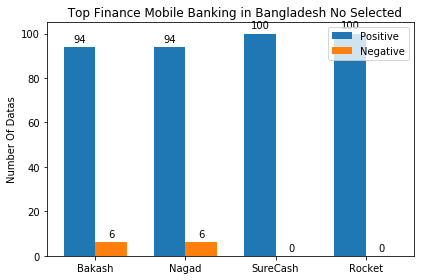

In [73]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Bakash', 'Nagad', 'SureCash', 'Rocket']

# Calculating Percentage Positive
bp_p = (len(positive_b) * 100)/(len(positive_b)+len(negative_b))
np_p = (len(positive_n) * 100)/(len(positive_n)+len(negative_n))
up_p = (len(positive_u) * 100)/(len(positive_u)+len(negative_u))
rp_p = (len(positive_r) * 100)/(len(positive_r)+len(negative_r))
print(bp_p)

# Calculating Percentage Negative
bn_p = (len(negative_b) * 100)/(len(positive_b)+len(negative_b))
nn_p = (len(negative_n) * 100)/(len(positive_n)+len(negative_n))
un_p = (len(negative_u) * 100)/(len(positive_u)+len(negative_u))
rn_p = (len(negative_r) * 100)/(len(positive_r)+len(negative_r))
print(bn_p)

positive_bar = [round(bp_p), round(np_p), round(up_p), round(rp_p)]
negative_bar = [round(bn_p), round(nn_p), round(un_p), round(rn_p)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
positive = ax.bar(x - width/2, positive_bar, width, label='Positive')
negative = ax.bar(x + width/2, negative_bar, width, label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Datas')
ax.set_title('  Top Finance Mobile Banking in Bangladesh No Selected')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(positive)
autolabel(negative)

fig.tight_layout()

plt.show()

# END Individual  Company In Together or Group Bar Chart for NO  SVM


# start  all (no-yes) all  - Using  SVM


In [74]:
positive_tb = len(positive_yb) + len(positive_nb)
negative_tb = len(negative_yb) + len(negative_nb)
positive_tr = len(positive_yr) + len(positive_nr)
negative_tr = len(negative_yr) + len(negative_nr)
positive_tn = len(positive_yn) + len(positive_nn)
negative_tn = len(negative_yn) + len(negative_nn)
positive_tu = len(positive_yu) + len(positive_nu)
negative_tu = len(negative_yu) + len(negative_nu)


In [75]:
print(negative_tr)

1


In [76]:
print(all_datas['sentiment'].tolist())

NameError: name 'all_datas' is not defined

# Full Result For Who Selected YES / NO ********************************** SVM Machine Learning Algorithm


94.23076923076923


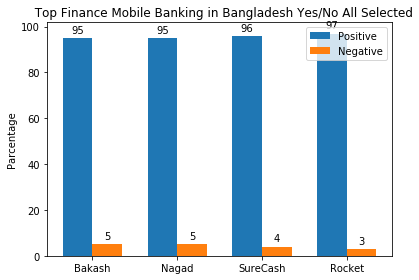

In [77]:
# Full Result For Who Selected YES / NO ********************************** SVM Machine Learning Algorithm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Bakash', 'Nagad', 'SureCash', 'Rocket']


# Calculating Percentage Positive
tbp_p = (positive_tb * 100)/(positive_tb+negative_tb)
tnp_p = (positive_tn * 100)/(positive_tn+negative_tn)
tup_p = (positive_tu * 100)/(positive_tu+negative_tu)
trp_p = (positive_tr * 100)/(positive_tr+negative_tu)
print(bp_p)

# Calculating Percentage Negative
tbn_p = (negative_tb * 100)/(positive_tb+negative_tb)
tnn_p = (negative_tn * 100)/(positive_tn+negative_tn)
tun_p = (negative_tu * 100)/(positive_tu+negative_tu)
trn_p = (negative_tu * 100)/(positive_tr+negative_tu)


men_means = [round(tbp_p), round(tnp_p), round(tup_p), round(trp_p)]
women_means = [round(tbn_p), round(tnn_p), round(tun_p), round(trn_p)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
positive = ax.bar(x - width/2, men_means, width, label='Positive')
negative = ax.bar(x + width/2, women_means, width, label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Parcentage')
ax.set_title('  Top Finance Mobile Banking in Bangladesh Yes/No All Selected')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(positive)
autolabel(negative)

fig.tight_layout()

plt.show()

# Start Coding For NO Selected Review

In [ ]:
col_names = ["test","sentiment"]
datas = pd.read_csv('data_store/no.csv',names=col_names,error_bad_lines=False)
# displaying data frame again - Output 2 
test_datas = datas['test'].tolist()
# print(datas.head())
sentiment_datas = datas['sentiment']

#Testing For Add Data in specific column
sentiment_datas[1] = 1
print(sentiment_datas)

In [ ]:
# Sentiment Prediction  from test data
i = 1
for data in test_datas:
    sample = [data]
    sample = tfidf.transform(sample)
    sentiment = rand.predict(sample)
    sentiment_datas[i] = int(sentiment)
    print(type(sentiment))
    print(data,"Sentiment : ",sentiment)
    i = i+1
#     print('********************************',sentiment) 
    

In [ ]:
print(datas.shape)
print(datas['sentiment'])
print(datas['sentiment'].count)

In [ ]:
# Count Positine and Negative
positive = []
negative = []

for d in datas['sentiment'].tolist():
    
    if d == 0:
        positive.append(0)
    else:
        negative.append(1)
print(datas['sentiment'])
print(len(negative))

In [ ]:
# Full Result For Who Selected NO ********************************** SVM Machine Learning Algorithm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Sentiment']
men_means = len(positive)
women_means = len(negative)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Positive')
rects2 = ax.bar(x + width/2, women_means, width, label='Negative')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number Of Datas')
ax.set_title('Apply Suppored Vactor For Sentiment Prediect')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()